In [7]:
#pip install python-binance

In [2]:
import numpy as np
import pandas as pd
from binance.client import Client
import math
import datetime
#import statsmodels.api as sm
api_key = ''

# 1. Import original data

In [3]:
client = Client(api_key)
klines = client.get_historical_klines('BTCUSDT', Client.KLINE_INTERVAL_1DAY, '1 Jan, 2022','1 Jan, 2023',)
df = pd.DataFrame(klines)
df.columns = ['Open_time','open','high','low','close','volume','Close_time', 'Quote asset volume', 'number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore']
df = df.apply(pd.to_numeric, errors='ignore')
df['Close_time'] = pd.to_datetime(df['Close_time'], unit='ms')
df.head(2)

,Open_time,open,high,low,close,volume,Close_time,Quote asset volume,number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,1640995200000,46216.93,47954.63,46208.37,47722.65,19604.46325,2022-01-01 23:59:59.999,9.241552e+08,714899,9942.36679,4.687387e+08,0
1,1641081600000,47722.66,47990.00,46654.00,47286.18,18340.46040,2022-01-02 23:59:59.999,8.666110e+08,709624,9166.46954,4.331824e+08,0


# 2. Time series and data selected

In [4]:
df = df[['Close_time','open','high','low','close','volume']]
df.index=pd.to_datetime(df.Close_time)
df.head(2)

,Close_time,open,high,low,close,volume
Close_time,,,,,,
2022-01-01 23:59:59.999,2022-01-01 23:59:59.999,46216.93,47954.63,46208.37,47722.65,19604.46325
2022-01-02 23:59:59.999,2022-01-02 23:59:59.999,47722.66,47990.00,46654.00,47286.18,18340.46040


# 3. Return%

In [5]:
df['B%']=(df['close']-df['close'].shift(1))/df['close'].shift(1)
df = df.dropna()
df.head(2)

,Close_time,open,high,low,close,volume,B%
Close_time,,,,,,,
2022-01-02 23:59:59.999,2022-01-02 23:59:59.999,47722.66,47990.0,46654.0,47286.18,18340.4604,-0.009146
2022-01-03 23:59:59.999,2022-01-03 23:59:59.999,47286.18,47570.0,45696.0,46446.10,27662.0771,-0.017766


In [6]:
#資料處理：time series型態變更+index更名
df.index = df.index.date
df.index.rename('Date', inplace=True)
df.head()

,Close_time,open,high,low,close,volume,B%
Date,,,,,,,
2022-01-02,2022-01-02 23:59:59.999,47722.66,47990.00,46654.00,47286.18,18340.46040,-0.009146
2022-01-03,2022-01-03 23:59:59.999,47286.18,47570.00,45696.00,46446.10,27662.07710,-0.017766
2022-01-04,2022-01-04 23:59:59.999,46446.10,47557.54,45500.00,45832.01,35491.41360,-0.013222
2022-01-05,2022-01-05 23:59:59.999,45832.01,47070.00,42500.00,43451.13,51784.11857,-0.051948
2022-01-06,2022-01-06 23:59:59.999,43451.14,43816.00,42430.58,43082.31,38880.37305,-0.008488


# 4. Draw unmeaning graph

In [7]:
#pip install mplfinance

import mplfinance as mpf
mpf_style = 'yahoo'
ylabel = 'Price'
mpf.plot(df, type='candle', style=mpf_style, title="BTCUSDT (unmeaning)", ylabel=ylabel, figsize=(10,5))

# 5. Market data

In [8]:
#!pip install yfinance

In [9]:
import yfinance as yf
mkt = yf.download('^TWII', start='2022-01-01', end='2023-01-01')
mkt = mkt[['Close']]
mkt.head(2)

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2022-01-03,18270.509766
2022-01-04,18526.349609


In [10]:
mkt['M%']=(mkt['Close']-mkt['Close'].shift(1))/mkt['Close'].shift(1)
mkt = mkt.dropna()
mkt.head(2)

<ipython-input-10-9665070cb75a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt['M%']=(mkt['Close']-mkt['Close'].shift(1))/mkt['Close'].shift(1)


,Close,M%
Date,,
2022-01-04,18526.349609,0.014003
2022-01-05,18499.960938,-0.001424


In [11]:
#資料處理：time series型態變更+index更名
mkt.index = mkt.index.date
mkt.index.rename('Date', inplace=True)
mkt.head()

,Close,M%
Date,,
2022-01-04,18526.349609,0.014003
2022-01-05,18499.960938,-0.001424
2022-01-06,18367.919922,-0.007137
2022-01-07,18169.759766,-0.010788
2022-01-10,18239.380859,0.003832


# 6. Merge

In [12]:
Mgdf = df
for x in [mkt]:
    Mgdf = Mgdf.merge(x,  on=['Date'], how='inner')
Mgdf.head(10)

,Close_time,open,high,low,close,volume,B%,Close,M%
Date,,,,,,,,,
2022-01-04,2022-01-04 23:59:59.999,46446.10,47557.54,45500.00,45832.01,35491.41360,-0.013222,18526.349609,0.014003
2022-01-05,2022-01-05 23:59:59.999,45832.01,47070.00,42500.00,43451.13,51784.11857,-0.051948,18499.960938,-0.001424
2022-01-06,2022-01-06 23:59:59.999,43451.14,43816.00,42430.58,43082.31,38880.37305,-0.008488,18367.919922,-0.007137
2022-01-07,2022-01-07 23:59:59.999,43082.30,43145.83,40610.00,41566.48,54836.50818,-0.035185,18169.759766,-0.010788
2022-01-10,2022-01-10 23:59:59.999,41864.62,42248.50,39650.00,41822.49,50729.17019,-0.001006,18239.380859,0.003832
2022-01-11,2022-01-11 23:59:59.999,41822.49,43100.00,41268.93,42729.29,37296.43729,0.021682,18288.210938,0.002677
2022-01-12,2022-01-12 23:59:59.999,42729.29,44322.00,42450.00,43902.66,33943.29280,0.027461,18375.400391,0.004768
2022-01-13,2022-01-13 23:59:59.999,43902.65,44500.00,42311.22,42560.11,34910.87762,-0.030580,18436.929688,0.003348
2022-01-14,2022-01-14 23:59:59.999,42558.35,43448.78,41725.95,43059.96,32640.88292,0.011745,18403.330078,-0.001822


In [13]:
#NAME.to_excel("BTC.xlsx")

In [14]:
print(len(df))
print(len(mkt))
print(len(Mgdf))

365
245
245


# 7. Regression

In [27]:
from sklearn import linear_model
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt

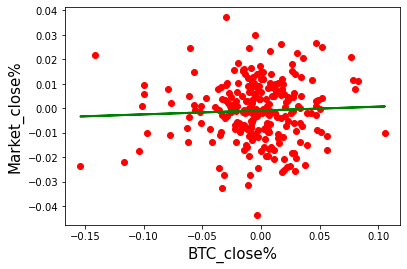

In [32]:
X=Mgdf['B%']
Y=Mgdf['M%']
X=np.array(X).reshape(len(X),1)                  # reshape：資料呈現矩陣m*n(此處可能無影響)
Y=np.array(Y)
model=linear_model.LinearRegression()
model.fit(X, Y)
plt.scatter(X, Y, color='red')
plt.xlabel('BTC_close%',fontsize=15)
plt.ylabel('Market_close%',fontsize=15)
plt.plot(X, model.predict(X),color='green',linewidth=2)     
plt.show()

In [33]:
print(model.intercept_)            #截距
print(model.coef_)                    #beta
print(f_regression(X, Y)[1])     #p-value

r_squared = model.score(X, Y) 
print(r_squared)                        #R-Square

-0.0009096864665817181
[0.01580206]
[0.48815326]
0.0019798646632332995
